# Proyecto Bancarrota - Coderhouse

## Integrantes

Brian Winkelman, Ignacio Baratto, Ingrid Rodrigues, Rodrigo Zelaya y Sebastián Salcedo

# Presentación del problema, preguntas y objetivos

## Objeto: ¿para qué se cuenta esta historia?

Se busca determinar la probabilidad de cierre de empresas Taiwanesas por declarar bancarrota (período 1999 - 2009), permitiendo identificar la solidez y rentabilidad de estas empresas en el país. Por lo tanto, se propone como objetivo predecir la probabilidad de que una empresa haya declarado o declare bancarrota.

## Contenido: ¿qué se quiere transmitir?

Se presenta por medio de la evaluación de variables financieras (relacionadas a activos, pasivos, patrimonio, etc.) las características de las empresas que cotizan en la bolsa de Taiwan y la posibilidad de declarar bancarrota en base a dichas características, donde se identifica la siguiente distribución:

 - No declaró banca rota = 97%
 - Declaró ancarrota = 3%

## Estructura: ¿cómo se relacionan los datos con la historia?

Breve resumen sobre Taiwán:

- Idioma: Chino Madnarin.
- Habitantes: 1,100 millones ; nativos 950 millones, otros 150 millones.
- Capital: Taipéi.
- Moneda: Nuevo dólar taiwanés.
- Sistema político: Democracia presidencialista, el presidente actúa como jefe de estado y la Asamblea Nacional sirve como órgano legislativo.
- Sectores Estratégicos: Alimentación, Automoción, Biotecnología, Medicina y Salud.
- Ranking de inversión: A pesar del pequeño tamaño de la isla, la economía taiwanesa se encuentra en el puesto 16° a nivel mundial en términos de paridad de poder adquisitivo per cápita. En el ámbito de negocios, Taiwán obtiene calificaciones favorables; la agencia de rating S&P califica a Taiwán con un nivel de riesgo de AA mientras que COFACE le otorga un nivel A.

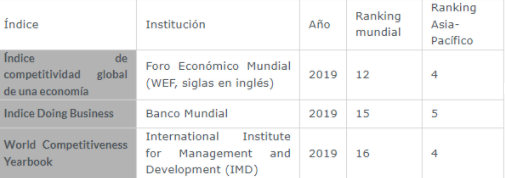


- Bolsa de valores de Taiwan: Taiwan Stock Exchange Corporation (TWSE) es una institución financiera ubicada en Taipei, Taiwán. TWSE fue creada en 1961 y comenzó a operar como bolsa de valores el 9 de febrero de 1962. Está regulada por la Comisión de Supervisión Financiera.

Se toman en consideración las siguientes variables referidas a empresas que cotizaron en la bolsa de valores de Taiwán entre 1999 y 2009:

- Net Income to Total Assets: esta variable captura lo que se conoce como el retorno sobre activos, que se define como el ratio entre el ingreso neto de una compañía y el total de sus activos. Por lo tanto, es un coeficiente de rentabilidad. A mayor (menor) ratio, mayor (menor) retorno sobre activos.
- Net Worth/Assets: esta variable se define como la resta entre el total de activos y el total de pasivos (patrimonio) de una empresa, dividido entre el total de activos. De esta forma, captura el porcentaje que representa el patrimonio de una empresa en el total de activos. A mayores (menores) porcentajes, mayor (menor) es el patrimonio de una empresa y menor (mayor) es su deuda en relación al total de sus activos.
- Persistent EPS in the Last Four Seasons: esta variable captura la magnitud en que las ganancias por acción publicadas resultaron persistentes en las últimas cuatro temporadas/años calendario. A mayor (menor) persistencia, mayor (menor) rendimiento por acción.
- Retained Earnings to Total Assets: esta variable representa el ratio entre las ganancias retenidas de una empresa y el total de sus activos. A mayor (menor) ratio, mayores (menores) son las ganancias retenidas por la empresa en relación a sus activos.
- Total expense/Assets: esta variable captura el porcentaje de gastos totales de una empresa en relación al total de activos. A mayor (menor) porcentaje, mayor (menor) es el nivel de gastos de una empresa en relación a sus activos.
- Debt ratio (%): esta variable mide el alcance del apalancamiento de deuda una empresa. A mayor (menor) ratio, mayor (menor) es la deuda total de una empresa en relación al total de sus activos.

El análisis presentado posteriormente en la sección titulada 'Data Wrangling y Exploratory Data Analysis (EDA)', permite identificar y plantear las siguientes tendencias:

- Hay un número muy pequeño de empresas declararon bancarrota en el período 1999 - 2009.
- Se identifican tres componentes cruciales para explicar este fenómeno: el primero, asociado a ingresos y ganancias ; el segundo, asociado a deuda y patrimonio ; y el tercero, asociado a utilidades y costos.
- En promedio, las empresas que declararon bancarrota presentan menor nivel de ingresos, patrimonio y ganancias en relación a sus activos, así como también un retorno menor hacia sus accionistas con respecto a las empresas que aún siguen cotizando y no declararon bancarrota.
- A su vez, en promedio, éstas empresas también presentan mayores niveles de deuda y mayores gastos con respecto a aquellas empresas que no declararon bancarrota.

In [1]:
#Importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
#No limitamos output de tablas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Acquisition

El conjunto de datos fue extraído de la página Kaggle y contiene información financiera de empresas que cotizaron en la bolsa de valores de Taiwán en el período 1999 - 2009. La elección del dataset se basó en las preferencias de los integrantes, encontrando un balance entre los gustos personales y el orden y la robustez de los datos. Así, seleccionamos un conjunto de datos "limpio" y completo con el fin de predecir la posibilidad de que una empresa declare bancarrota.

In [3]:
#Creamos conexción a repositorio de GitHub creado para el proyecto con acceso público
url = 'https://raw.githubusercontent.com/lechori/proyectobancarrota/master/bankruptcy-data.csv'

In [4]:
#Lectura de dataset
df = pd.read_csv(url)

# Data Wrangling y Exploratoy Data Analysis (EDA)

En esta sección, se realiza una mínima limpieza y reducción de los datos para luego realizar un análsis detallado tanto del comportamiento de cada variable como de la interacción entre cada una de las variables. Cabe destacar que la muestra del conjunto de datos está fuertemente desbalanceada, problema que se abordará al momento de construir el modelo de predicción.

In [5]:
#Removemos espacios en nombres de columnas
df.columns = df.columns.str.replace(' ', '')

In [6]:
#Pantallazo inicial del dataset
df.head()

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,Continuousinterestrate(aftertax),OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interest-bearingdebtinterestrate,Taxrate(A),NetValuePerShare(B),NetValuePerShare(A),NetValuePerShare(C),PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShare(Yuan¥),OperatingProfitPerShare(Yuan¥),PerShareNetprofitbeforetax(Yuan¥),RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,After-taxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment%,CurrentRatio,QuickRatio,InterestExpenseRatio,Totaldebt/Totalnetworth,Debtratio%,Networth/Assets,Long-termfundsuitabilityratio(A),Borrowingdependency,Contingentliabilities/Networth,Operatingprofit/Paid-incapital,Netprofitbeforetax/Paid-incapital,Inventoryandaccountsreceivable/Netvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRate(times),FixedAssetsTurnoverFrequency,NetWorthTurnoverRate(times),Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssets/TotalAssets,CurrentAssets/TotalAssets,Cash/TotalAssets,QuickAssets/CurrentLiability,Cash/CurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,Inventory/WorkingCapital,Inventory/CurrentLiability,CurrentLiabilities/Liability,WorkingCapital/Equity,CurrentLiabilities/Equity,Long-termLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,Totalincome/Totalexpense,Totalexpense/Assets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLong-termLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0

In [7]:
#Estadísticas descriptivas
df.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819,0.0322628,0.17671,0,0,0,0,1
ROA(C)beforeinterestanddepreciationbeforeinterest,6819,0.50518,0.0606856,0,0.476527,0.502706,0.535563,1
ROA(A)beforeinterestand%aftertax,6819,0.558625,0.06562,0,0.535543,0.559802,0.589157,1
ROA(B)beforeinterestanddepreciationaftertax,6819,0.553589,0.0615948,0,0.527277,0.552278,0.584105,1
OperatingGrossMargin,6819,0.607948,0.0169338,0,0.600445,0.605997,0.613914,1
RealizedSalesGrossMargin,6819,0.607929,0.0169161,0,0.600434,0.605976,0.613842,1
OperatingProfitRate,6819,0.998755,0.01301,0,0.998969,0.999022,0.999095,1
Pre-taxnetInterestRate,6819,0.79719,0.012869,0,0.797386,0.797464,0.797579,1
After-taxnetInterestRate,6819,0.809084,0.0136007,0,0.809312,0.809375,0.809469,1
Non-industryincomeandexpenditure/revenue,6819,0.303623,0.0111634,0,0.303466,0.303525,0.303585,1


In [8]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bankrupt?                                          6819 non-null   int64  
 1   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 2   ROA(A)beforeinterestand%aftertax                   6819 non-null   float64
 3   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 4   OperatingGrossMargin                               6819 non-null   float64
 5   RealizedSalesGrossMargin                           6819 non-null   float64
 6   OperatingProfitRate                                6819 non-null   float64
 7   Pre-taxnetInterestRate                             6819 non-null   float64
 8   After-taxnetInterestRate                           6819 non-null   float64
 9   Non-indu

In [9]:
#Dimensión del dataset
df.shape

(6819, 96)

In [10]:
#Cantidad de tipos de datos en el dataset
df.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [11]:
#Cantidad de valores nulos en el dataset
df.isnull().any().value_counts()

False    96
dtype: int64

In [12]:
#Muestra de la variable objetivo: se identifica una muestra desbalanceada
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
#Muestra de la variable objetivo expresada en %
df['Bankrupt?'].value_counts(True)*100

0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64

In [14]:
print('No Bankruptcy:',round(df['Bankrupt?'].value_counts(True)[0]*100),'%\n','Bankruptcy:',round(df['Bankrupt?'].value_counts(True)[1]*100),'%')

No Bankruptcy: 97 %
 Bankruptcy: 3 %


<AxesSubplot:>

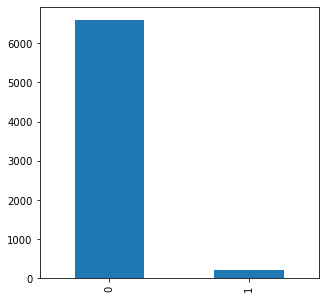

In [15]:
f, ax = plt.subplots(figsize=(5,5))
df['Bankrupt?'].value_counts().plot.bar()

## Filtrado de los datos

Reducimos nuestro análisis a las variables con mayor correlación (tanto positiva como negativa) respecto a la variable objetivo (Bankrupt), y excluyendo de las mismas aquellas que son muy similares entre sí:

- NetIncometoTotalAssets


- Networth/Assets


- PersistentEPSintheLastFourSeasons


- RetainedEarningstoTotalAssets


- Totalexpense/Assets


- Debtratio%

In [16]:
correlacion = pd.DataFrame(df.corrwith(df['Bankrupt?']).sort_values())
correlacion.rename(columns={0:'Correlación con variable objetivo'}, inplace=True )
correlacion.drop(index='NetIncomeFlag', inplace=True)
correlacion.drop(index='Bankrupt?', inplace=True)
correlacion

,Correlación con variable objetivo
NetIncometoTotalAssets,-0.315457
ROA(A)beforeinterestand%aftertax,-0.282941
ROA(B)beforeinterestanddepreciationaftertax,-0.273051
ROA(C)beforeinterestanddepreciationbeforeinterest,-0.260807
Networth/Assets,-0.250161
PersistentEPSintheLastFourSeasons,-0.219560
RetainedEarningstoTotalAssets,-0.217779
Netprofitbeforetax/Paid-incapital,-0.207857
PerShareNetprofitbeforetax(Yuan¥),-0.201395
WorkingCapitaltoTotalAssets,-0.193083


## Análisis univariado, bivariado y multivariado

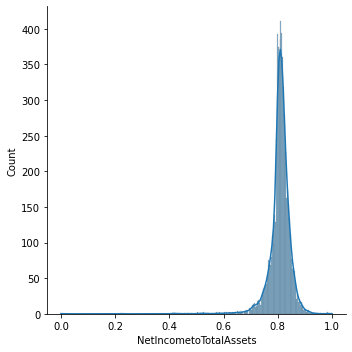

In [17]:
sns.displot(df['NetIncometoTotalAssets'], kde = True)
plt.show()

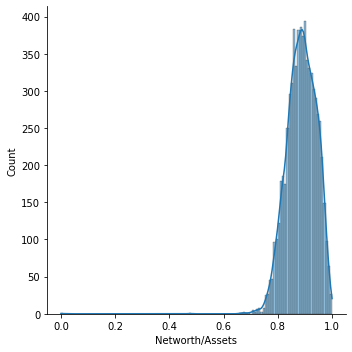

In [18]:
sns.displot(df['Networth/Assets'], kde = True)
plt.show()

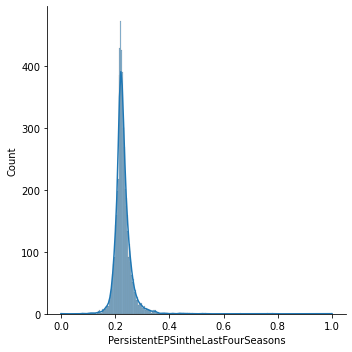

In [19]:
sns.displot(df['PersistentEPSintheLastFourSeasons'], kde = True)
plt.show()

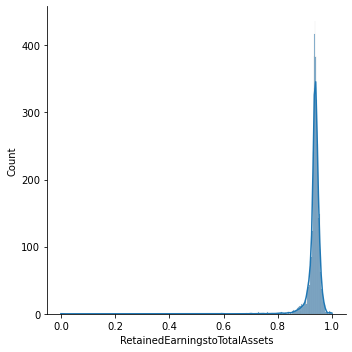

In [20]:
sns.displot(df['RetainedEarningstoTotalAssets'], kde = True)
plt.show()

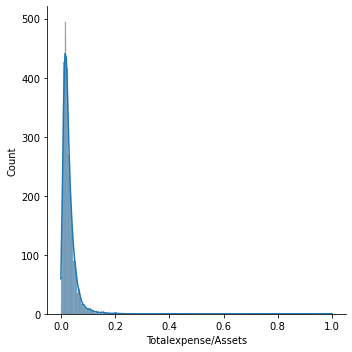

In [21]:
sns.displot(df['Totalexpense/Assets'], kde = True)
plt.show()

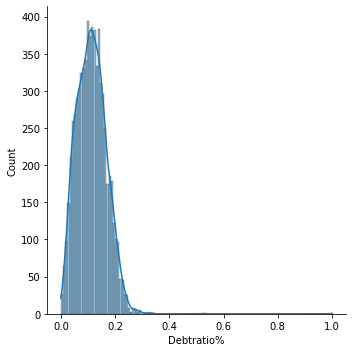

In [22]:
sns.displot(df['Debtratio%'], kde = True)
plt.show()

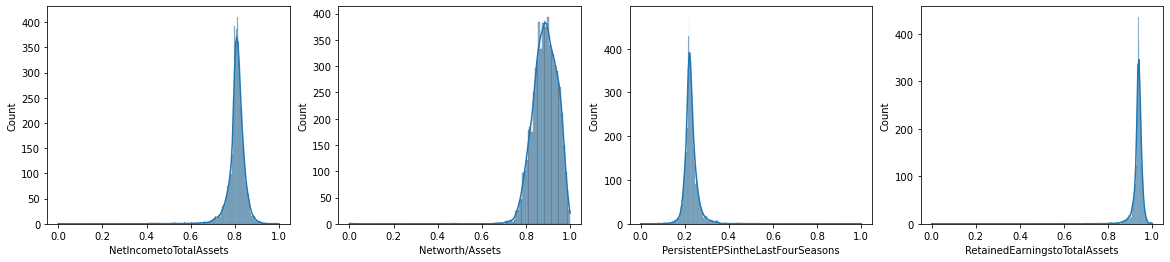

In [23]:
#Agruapmos gráficos conteniendo aquellas variables con correlación negativa

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

sns.histplot(data=df, x='NetIncometoTotalAssets', kde=True, ax=axs[0])
sns.histplot(data=df, x='Networth/Assets', kde=True, ax=axs[1])
sns.histplot(data=df, x='PersistentEPSintheLastFourSeasons', kde=True, ax=axs[2])
sns.histplot(data=df, x='RetainedEarningstoTotalAssets', kde=True, ax=axs[3])

plt.show()

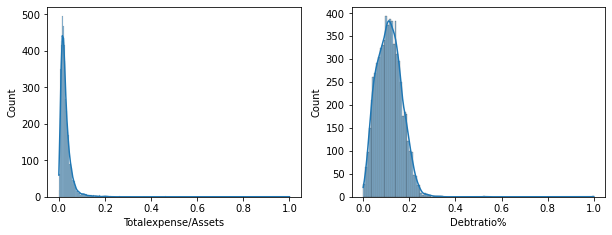

In [24]:
#Agruapmos gráficos conteniendo aquellas variables con correlación positiva

fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))

sns.histplot(data=df, x='Totalexpense/Assets', kde=True, ax=axs[0])
sns.histplot(data=df, x='Debtratio%', kde=True, ax=axs[1])

plt.show()

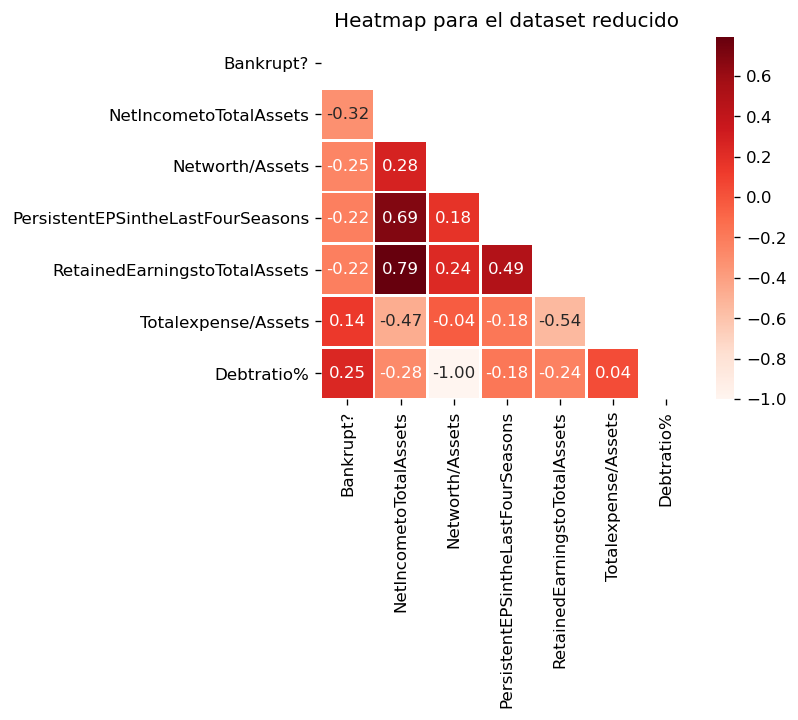

In [25]:
#Heatmap de las variables seleccionadas y variable objetivo

df_reduced = df[['Bankrupt?', 'NetIncometoTotalAssets', 'Networth/Assets', 'PersistentEPSintheLastFourSeasons', 'RetainedEarningstoTotalAssets', 'Totalexpense/Assets', 'Debtratio%']]

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_reduced.corr(),dtype = bool))
sns.heatmap(df_reduced.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Reds')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap para el dataset reducido')
plt.show()

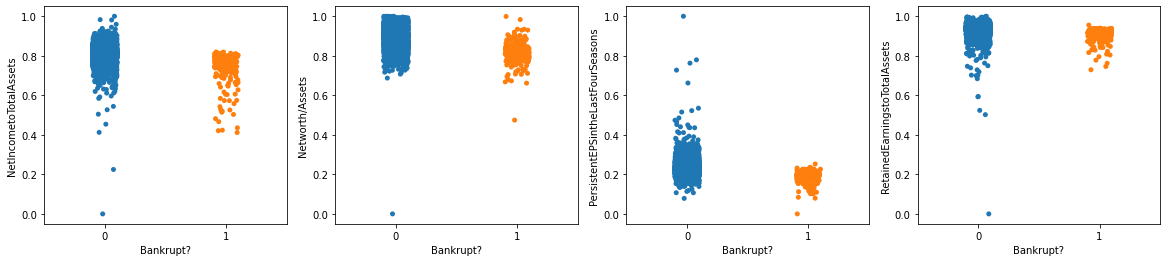

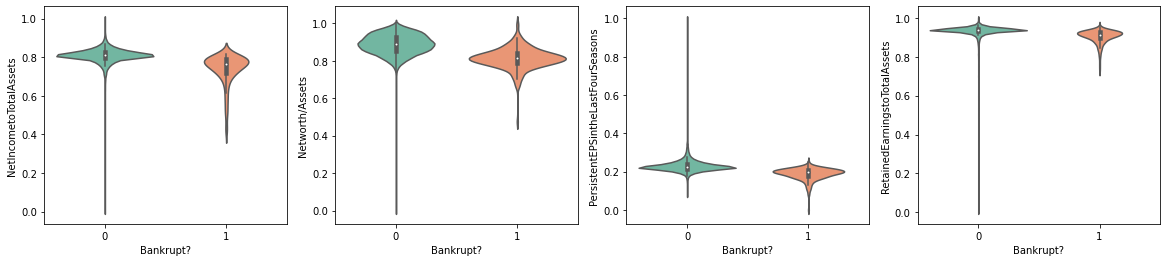

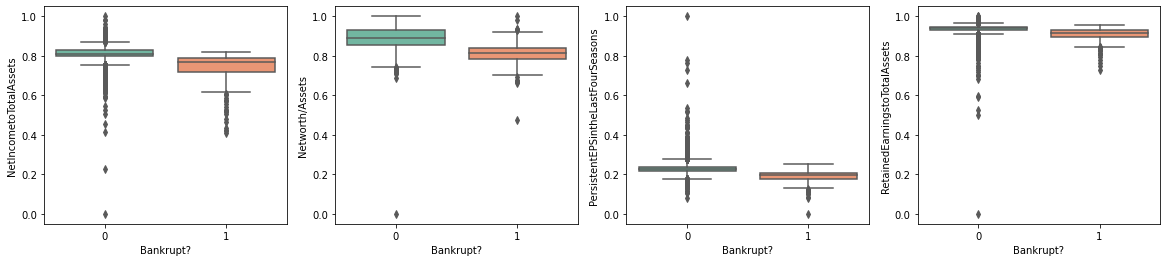

In [26]:
#Relación entre variables con correlación negativa y variable objetivo

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

sns.stripplot(x = df_reduced['Bankrupt?'], y = df_reduced['NetIncometoTotalAssets'], data=df_reduced, ax=axs[0])
sns.stripplot(x = df_reduced['Bankrupt?'], y = df_reduced['Networth/Assets'], data=df_reduced, ax=axs[1])
sns.stripplot(x = df_reduced['Bankrupt?'], y = df_reduced['PersistentEPSintheLastFourSeasons'], data=df_reduced, ax=axs[2])
sns.stripplot(x = df_reduced['Bankrupt?'], y = df_reduced['RetainedEarningstoTotalAssets'], data=df_reduced, ax=axs[3])

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

sns.violinplot(x = df_reduced['Bankrupt?'], y = df_reduced['NetIncometoTotalAssets'], data=df_reduced,palette = 'Set2', ax=axs[0])
sns.violinplot(x = df_reduced['Bankrupt?'], y = df_reduced['Networth/Assets'], data=df_reduced,palette = 'Set2', ax=axs[1])
sns.violinplot(x = df_reduced['Bankrupt?'], y = df_reduced['PersistentEPSintheLastFourSeasons'], data=df_reduced,palette = 'Set2', ax=axs[2])
sns.violinplot(x = df_reduced['Bankrupt?'], y = df_reduced['RetainedEarningstoTotalAssets'], data=df_reduced,palette = 'Set2', ax=axs[3])

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

sns.boxplot(x = df_reduced['Bankrupt?'], y = df_reduced['NetIncometoTotalAssets'], data=df_reduced,palette = 'Set2', ax=axs[0])
sns.boxplot(x = df_reduced['Bankrupt?'], y = df_reduced['Networth/Assets'], data=df_reduced,palette = 'Set2', ax=axs[1])
sns.boxplot(x = df_reduced['Bankrupt?'], y = df_reduced['PersistentEPSintheLastFourSeasons'], data=df_reduced,palette = 'Set2', ax=axs[2])
sns.boxplot(x = df_reduced['Bankrupt?'], y = df_reduced['RetainedEarningstoTotalAssets'], data=df_reduced,palette = 'Set2', ax=axs[3])


plt.show()

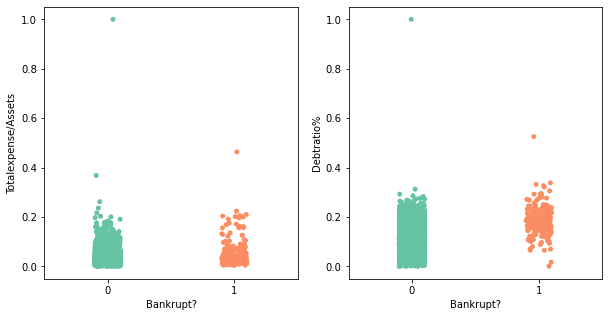

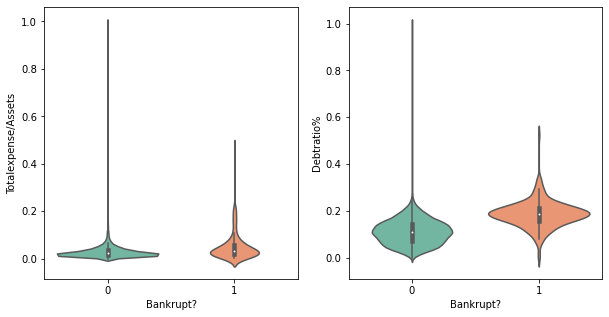

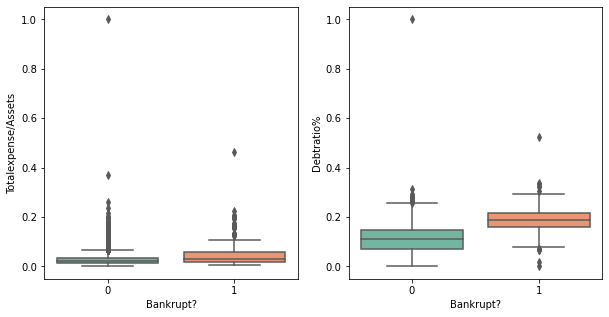

In [27]:
#Relación entre variables con correlación positiva y variable objetivo

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.stripplot(x = df_reduced['Bankrupt?'], y = df_reduced['Totalexpense/Assets'], data=df_reduced,palette = 'Set2', ax=axs[0])
sns.stripplot(x = df_reduced['Bankrupt?'], y = df_reduced['Debtratio%'], data=df_reduced,palette = 'Set2', ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(x = df_reduced['Bankrupt?'], y = df_reduced['Totalexpense/Assets'], data=df_reduced,palette = 'Set2', ax=axs[0])
sns.violinplot(x = df_reduced['Bankrupt?'], y = df_reduced['Debtratio%'], data=df_reduced,palette = 'Set2', ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x = df_reduced['Bankrupt?'], y = df_reduced['Totalexpense/Assets'], data=df_reduced,palette = 'Set2', ax=axs[0])
sns.boxplot(x = df_reduced['Bankrupt?'], y = df_reduced['Debtratio%'], data=df_reduced,palette = 'Set2', ax=axs[1])

plt.show()

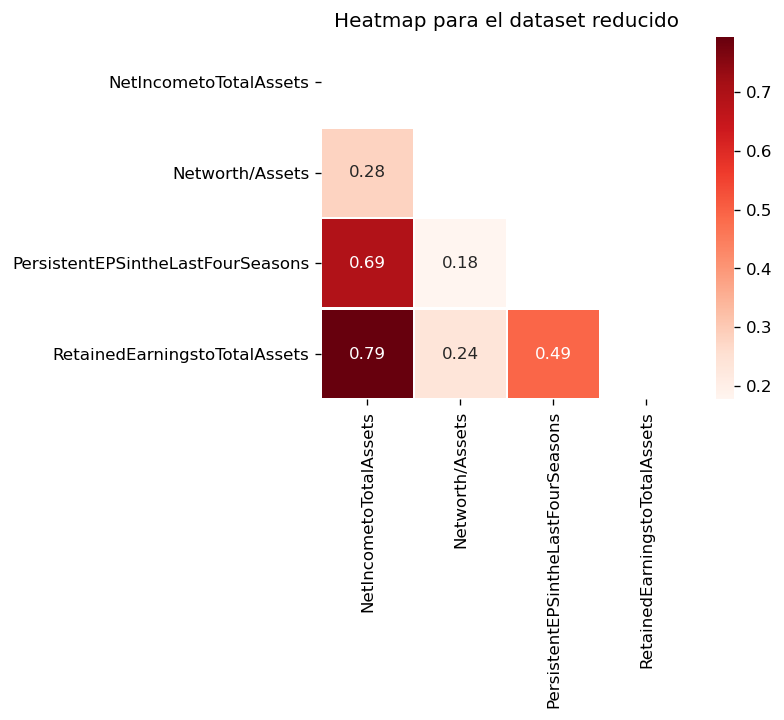

In [28]:
#Relación entre variables con correlación negativa respecto a la variable objetivo
df_reduced_negative= df[['NetIncometoTotalAssets', 'Networth/Assets', 'PersistentEPSintheLastFourSeasons', 'RetainedEarningstoTotalAssets']]
df_reduced_negative.corr()

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_reduced_negative.corr(),dtype = bool))
sns.heatmap(df_reduced_negative.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Reds')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Heatmap para el dataset reducido')
plt.show()

In [29]:
#Relación entre variables con correlación positiva respecto a la variable objetivo
df_reduced_positive= df[['Totalexpense/Assets', 'Debtratio%']]
df_reduced_positive.corr()

,Totalexpense/Assets,Debtratio%
Totalexpense/Assets,1.000000,0.037513
Debtratio%,0.037513,1.000000


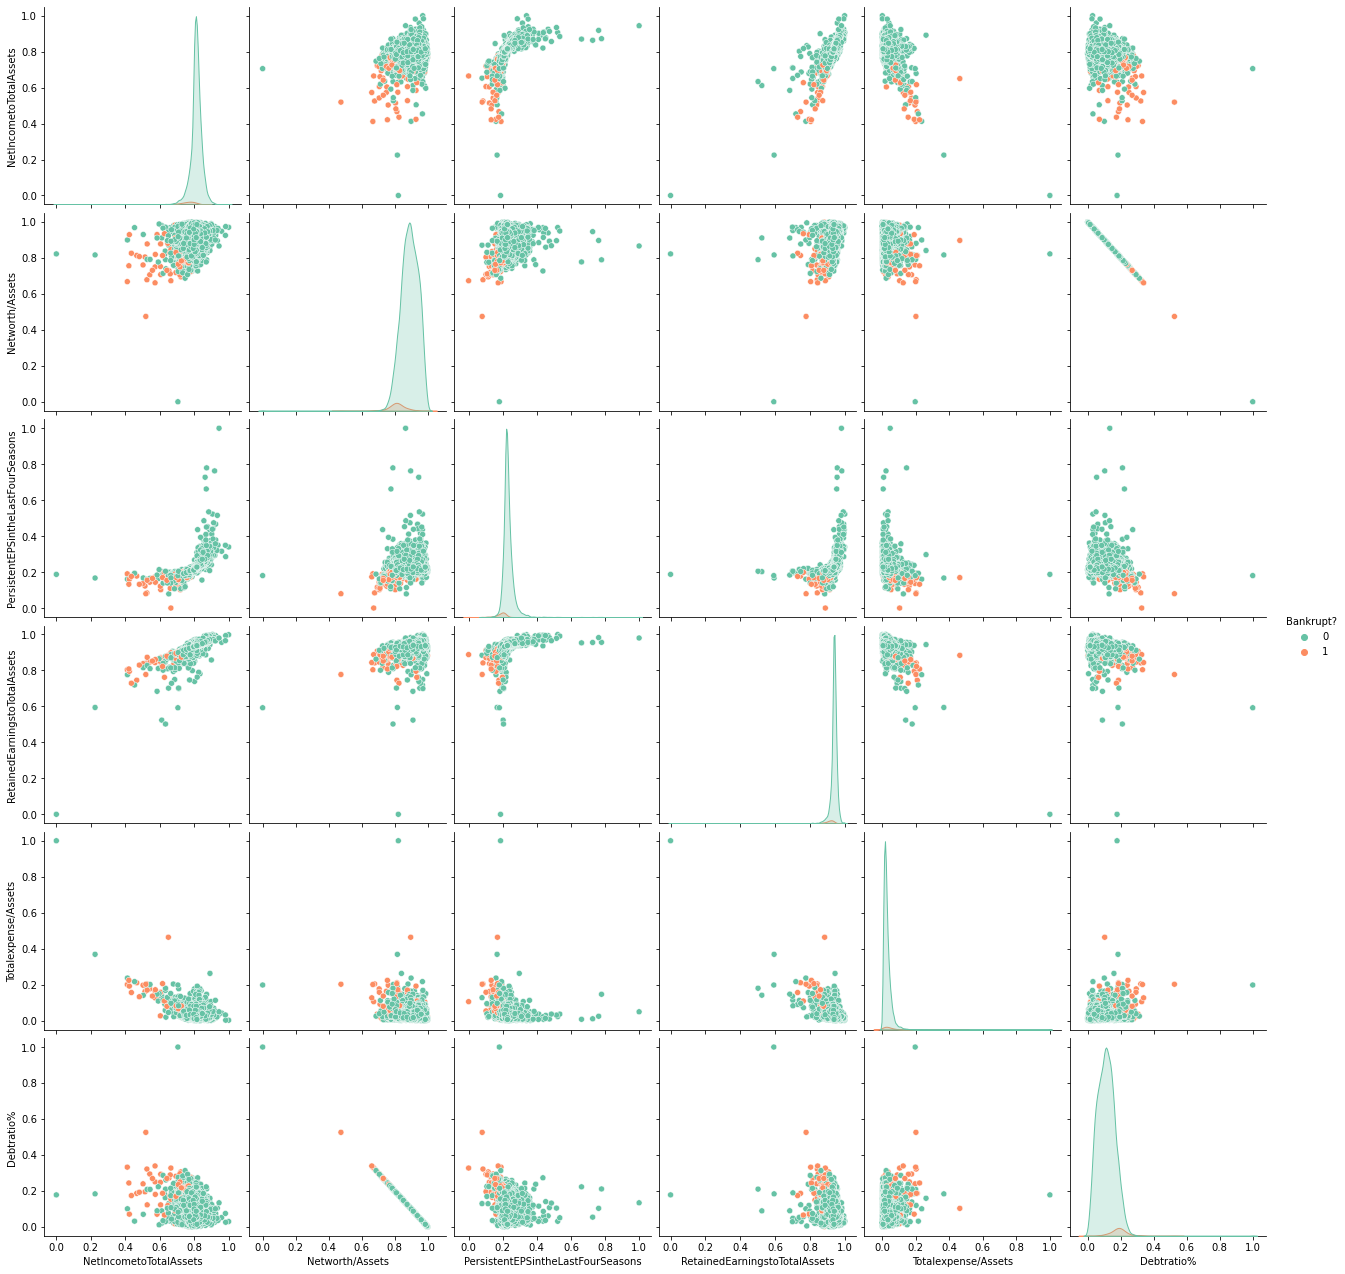

In [30]:
#Relación entre variables reducidas (con correlación positiva y correlación negativa) y variable objetivo
sns.pairplot(df_reduced, hue='Bankrupt?', height = 3, palette = 'Set2')

# Principal Component Analysis (PCA)

A continuación, se presenta un análisis de componentes principales y la conclusión acerca del mismo.

In [31]:
dfpca = df_reduced.drop(columns=['Bankrupt?'])

In [32]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dfpca)
modelo_pca = pca_pipe.named_steps['pca']

In [33]:
pca = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dfpca.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

pca.round(3)

,NetIncometoTotalAssets,Networth/Assets,PersistentEPSintheLastFourSeasons,RetainedEarningstoTotalAssets,Totalexpense/Assets,Debtratio%
PC1,-0.513,-0.357,-0.396,-0.480,0.307,0.357
PC2,-0.235,0.600,-0.196,-0.262,0.342,-0.600
PC3,0.157,-0.091,0.660,-0.120,0.713,0.091
PC4,-0.179,0.057,0.510,-0.650,-0.528,-0.057
PC5,0.791,-0.023,-0.330,-0.513,0.040,0.023
PC6,-0.000,-0.707,0.000,0.000,-0.000,-0.707


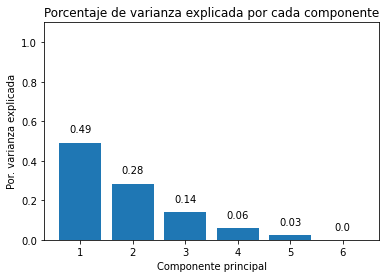

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dfpca.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Como conclusión de este análisis, se pueden identificar tres componentes principales que explican la mayoría de la varianza de los datos (un 91%):

1) Primer componente: asociado a variables que explican las ganancias e ingresos de una empresa (Net Income to Total Assets y Retained Earnings to Total Assets).

2) Segundo componente: asociado a variables que explican la deuda y patrimonio de una empresa (Networth/Assets y Debt ratio%).

3) Tercer componente: asociado a variables que explican las utilidades repartidas y los costos de una empresa (Persistent EPS in the Last Four Seasons y Totalexpense/Assets)